Chapter 02

# 统计描述
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

此代码用于加载鸢尾花数据集，并通过多种方式对其进行可视化分析。具体内容包括热力图、直方图、多变量联合图、核密度估计、分类数据对比、相关性矩阵、偏度与峰度等的展示。代码使用 seaborn、matplotlib 等可视化库，以多种图表形式揭示鸢尾花不同特征之间的关系，展示不同类别（Setosa、Versicolor、Virginica）的统计特性，并对数据的均值、标准差、四分位数等进行标注。代码分多个小节，便于分别展示数据集的不同方面。

公式涉及特征名称标注，例如花萼长度用 $X_1$ 表示，花萼宽度用 $X_2$ 表示等。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

## 加载数据集

In [2]:
# iris_sns = sns.load_dataset("iris") # 加载鸢尾花数据集（来自seaborn库）
# iris_sns.to_pickle('iris_sns.pkl')
iris_sns = pd.read_pickle('iris_sns.pkl')
# iris = load_iris() # 加载鸢尾花数据集（来自sklearn库）

In [3]:
iris_sns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# X = iris.data # 提取特征矩阵
# y = iris.target # 提取类别标签

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$', 
                 'Petal length, $X_3$','Petal width, $X_4$'] # 定义特征名称

In [5]:
# X_df = pd.DataFrame(X, columns=feature_names) # 将特征矩阵转换为数据框
# X_df.to_pickle('X_df_iris.pkl')
X_df = pd.read_pickle('X_df_iris.pkl')

## 热力图

Text(0.5, 1.0, 'X')

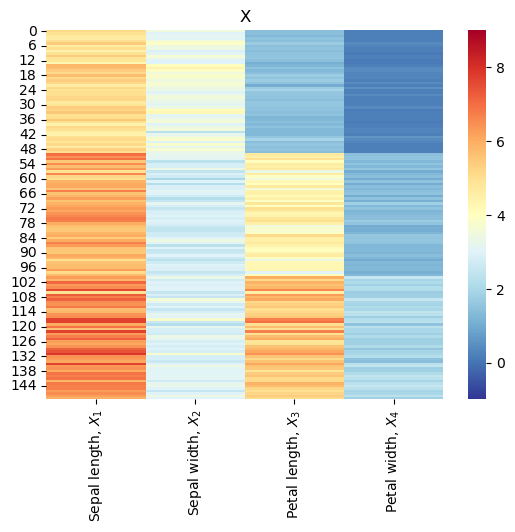

In [6]:
fig, ax = plt.subplots()
ax = sns.heatmap(X_df, cmap='RdYlBu_r', xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"}, vmin=-1, vmax=9) # 绘制热力图
plt.title('X') # 设置标题

## 直方图

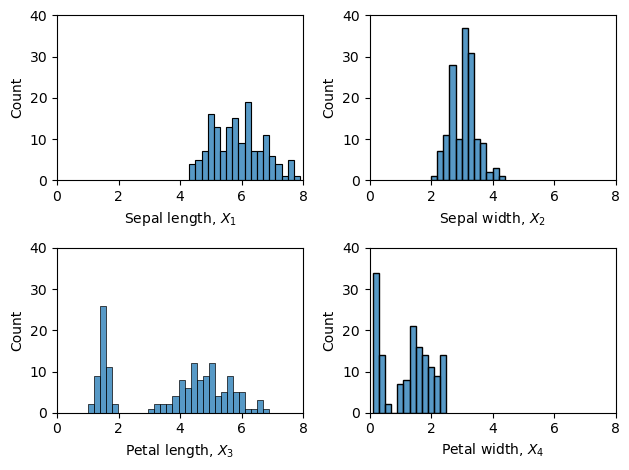

In [7]:
fig, axes = plt.subplots(2,2)
sns.histplot(data=X_df, x = feature_names[0], binwidth = 0.2, ax = axes[0][0]) # 绘制花萼长度直方图
axes[0][0].set_xlim([0,8]); axes[0][0].set_ylim([0,40]) # 设置坐标轴范围
sns.histplot(data=X_df, x = feature_names[1], binwidth = 0.2, ax = axes[0][1]) # 绘制花萼宽度直方图
axes[0][1].set_xlim([0,8]); axes[0][1].set_ylim([0,40])
sns.histplot(data=X_df, x = feature_names[2], binwidth = 0.2, ax = axes[1][0]) # 绘制花瓣长度直方图
axes[1][0].set_xlim([0,8]); axes[1][0].set_ylim([0,40])
sns.histplot(data=X_df, x = feature_names[3], binwidth = 0.2, ax = axes[1][1]) # 绘制花瓣宽度直方图
axes[1][1].set_xlim([0,8]); axes[1][1].set_ylim([0,40])
plt.tight_layout() # 调整布局


## 多个直方图在同一图中绘制

<Axes: ylabel='Count'>

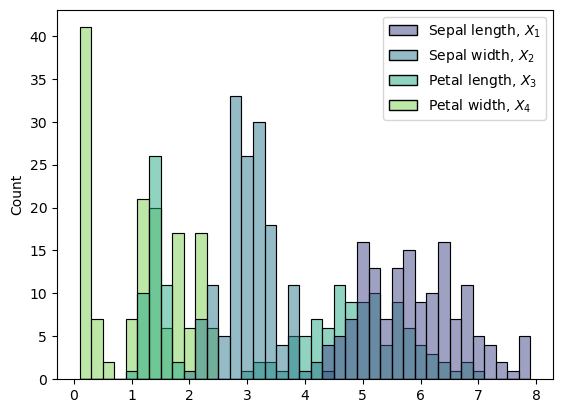

In [8]:
fig, ax = plt.subplots()
sns.histplot(data=X_df, palette = "viridis", binwidth = 0.2) # 绘制多个特征的直方图

<Axes: ylabel='Density'>

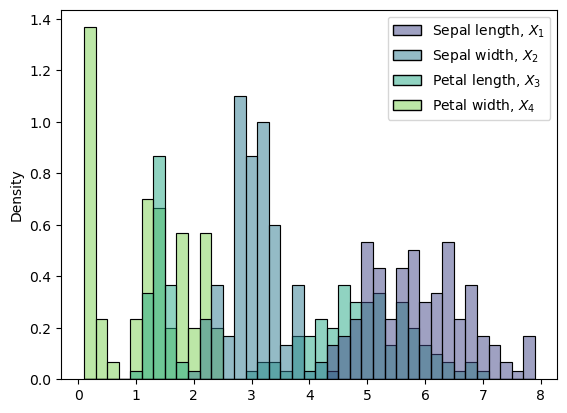

In [9]:
fig, ax = plt.subplots()
sns.histplot(data=X_df, palette = "viridis", binwidth = 0.2, stat="density", common_norm=False) # 绘制密度统计直方图

## 累积直方图

<Axes: ylabel='Count'>

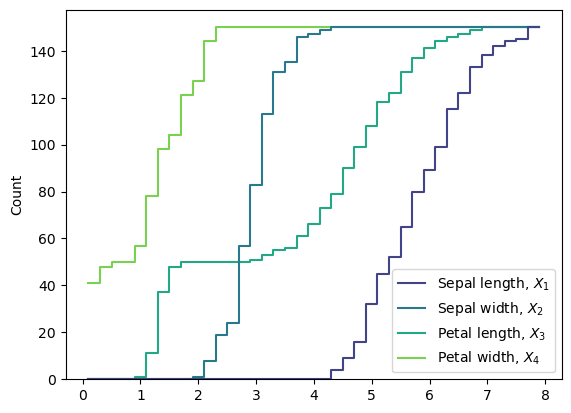

In [10]:
fig, ax = plt.subplots()
sns.histplot(data=X_df, palette = "viridis", fill = False, binwidth = 0.2, element="step", cumulative=True, common_norm=False) # 绘制累积直方图

<Axes: ylabel='Density'>

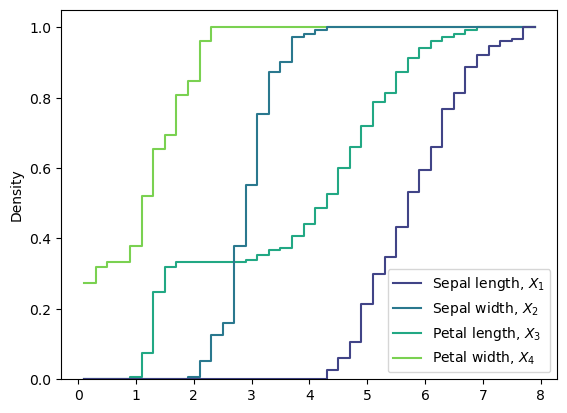

In [11]:
fig, ax = plt.subplots()
sns.histplot(data=X_df, palette = "viridis", fill = False, binwidth = 0.2, element="step", stat="density", cumulative=True, common_norm=False) # 绘制密度累积直方图

## 直方图的变体

<Axes: ylabel='Density'>

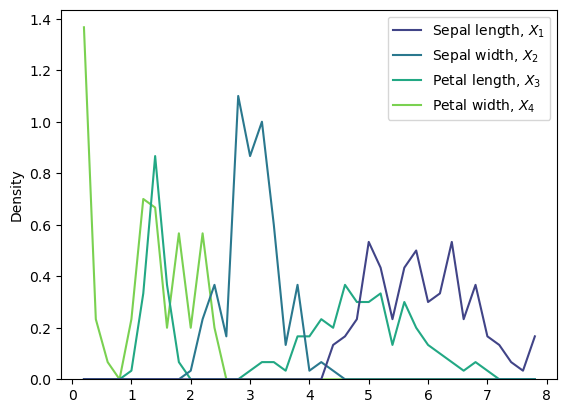

In [12]:
fig, ax = plt.subplots()
sns.histplot(data=X_df, palette = "viridis", fill = False, binwidth = 0.2, element="poly", stat="density", common_norm=False) # 绘制多边形密度直方图

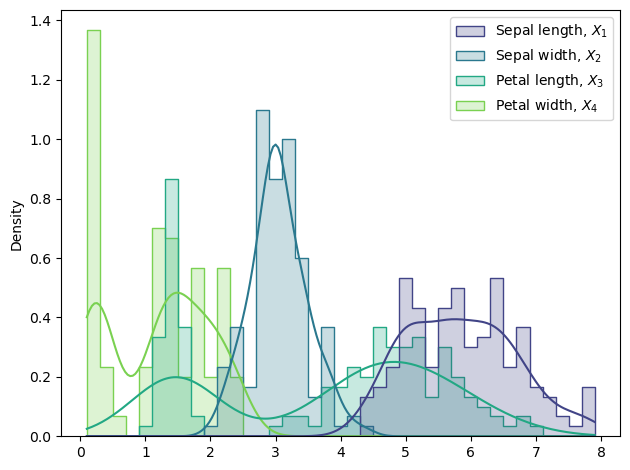

In [13]:
fig, ax = plt.subplots()
sns.histplot(data=X_df, palette = "viridis", binwidth = 0.2, element="step", kde=True, stat="density", common_norm=False) # 绘制密度估计曲线的阶梯直方图
plt.tight_layout() # 调整布局

## 核密度估计 (KDE)

<Axes: ylabel='Density'>

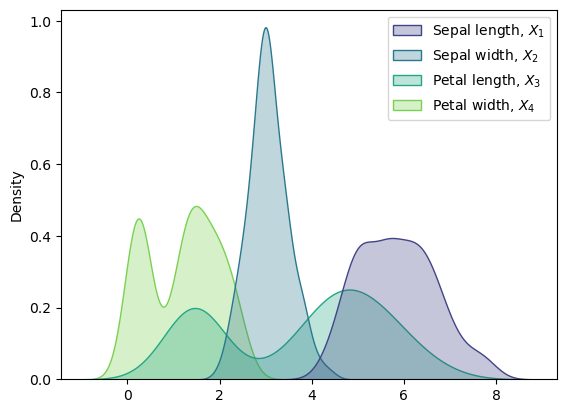

In [14]:

fig, ax = plt.subplots()
sns.kdeplot(data=X_df, fill=True, common_norm=False, alpha=.3, linewidth=1, palette = "viridis") # 绘制核密度估计图

## 双变量分析

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

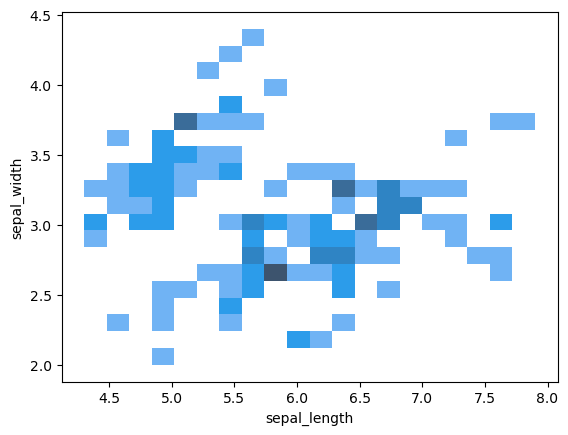

In [15]:
fig, ax = plt.subplots()
sns.histplot(iris_sns, x="sepal_length", y="sepal_width", bins=20) # 绘制双变量的直方图

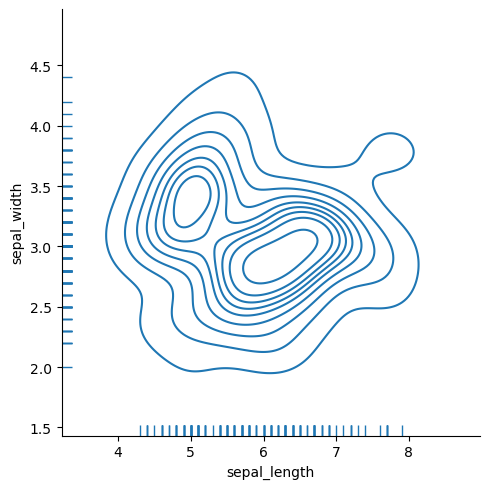

In [16]:
sns.displot(iris_sns, x="sepal_length", y="sepal_width", kind="kde", rug=True) # 绘制双变量的核密度估计图

## 联合图的变体

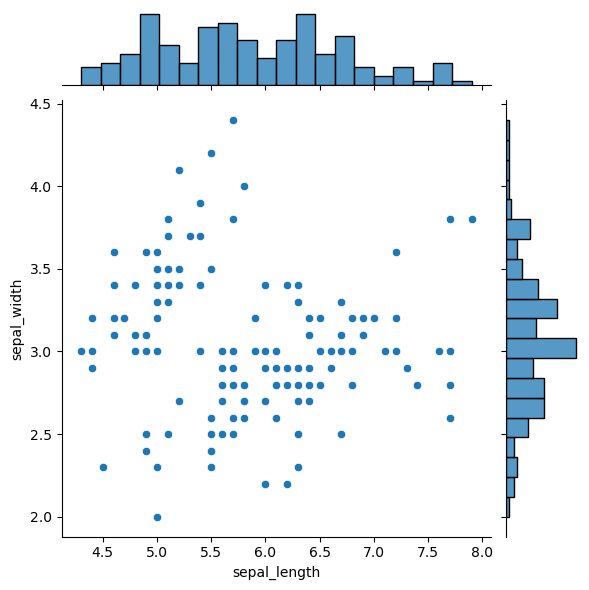

In [17]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", marginal_kws=dict(bins=20, fill=True)) # 绘制联合直方图

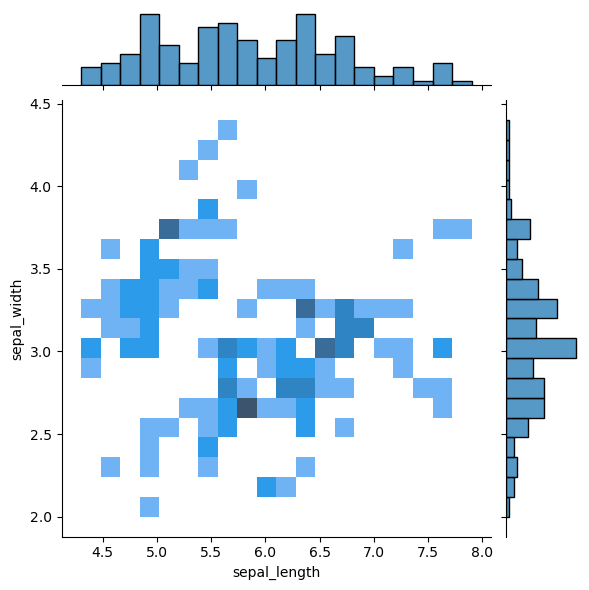

In [18]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='hist', bins=20, marginal_kws=dict(bins=20, fill=True)) # 绘制联合直方图（直方形式）

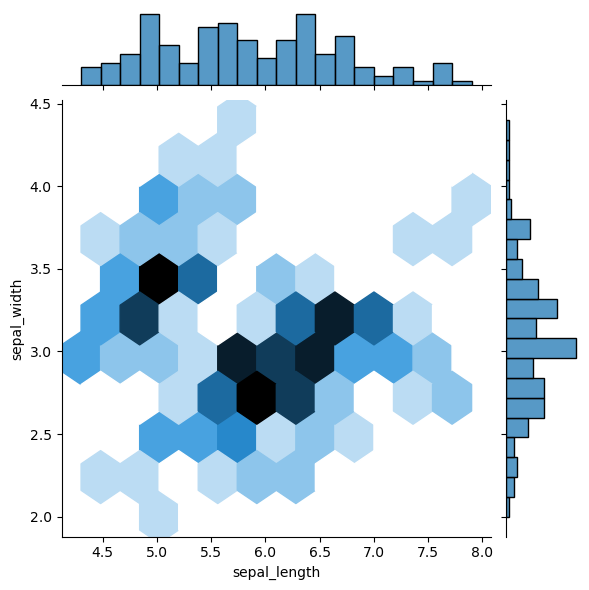

In [19]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='hex', bins=20, marginal_kws=dict(bins=20, fill=True)) # 绘制联合直方图（六边形网格形式）

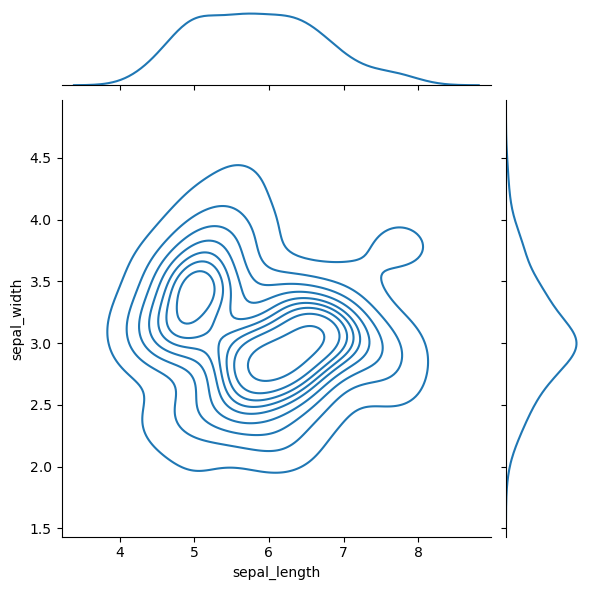

In [20]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde') # 绘制联合核密度估计图

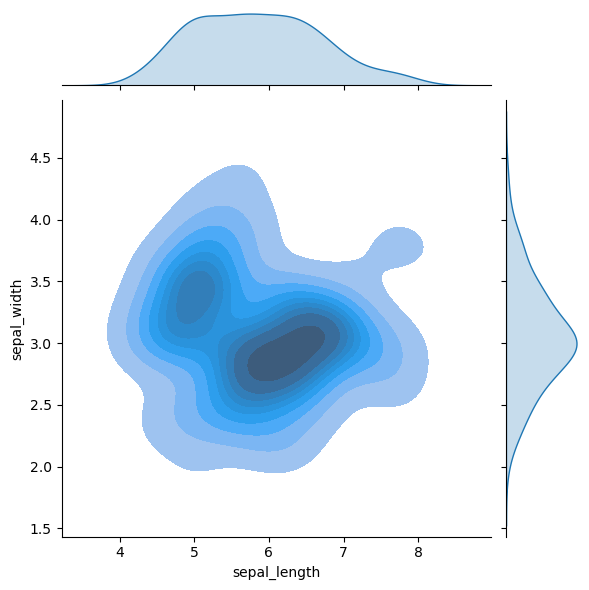

In [21]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde', fill=True) # 绘制填充的联合核密度估计图

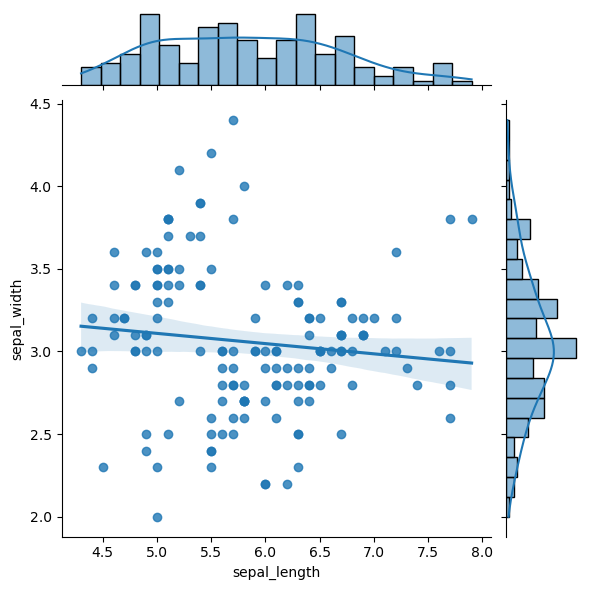

In [22]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='reg', marginal_kws=dict(bins=20, fill=True)) # 绘制联合线性回归图

## 多变量成对关系图

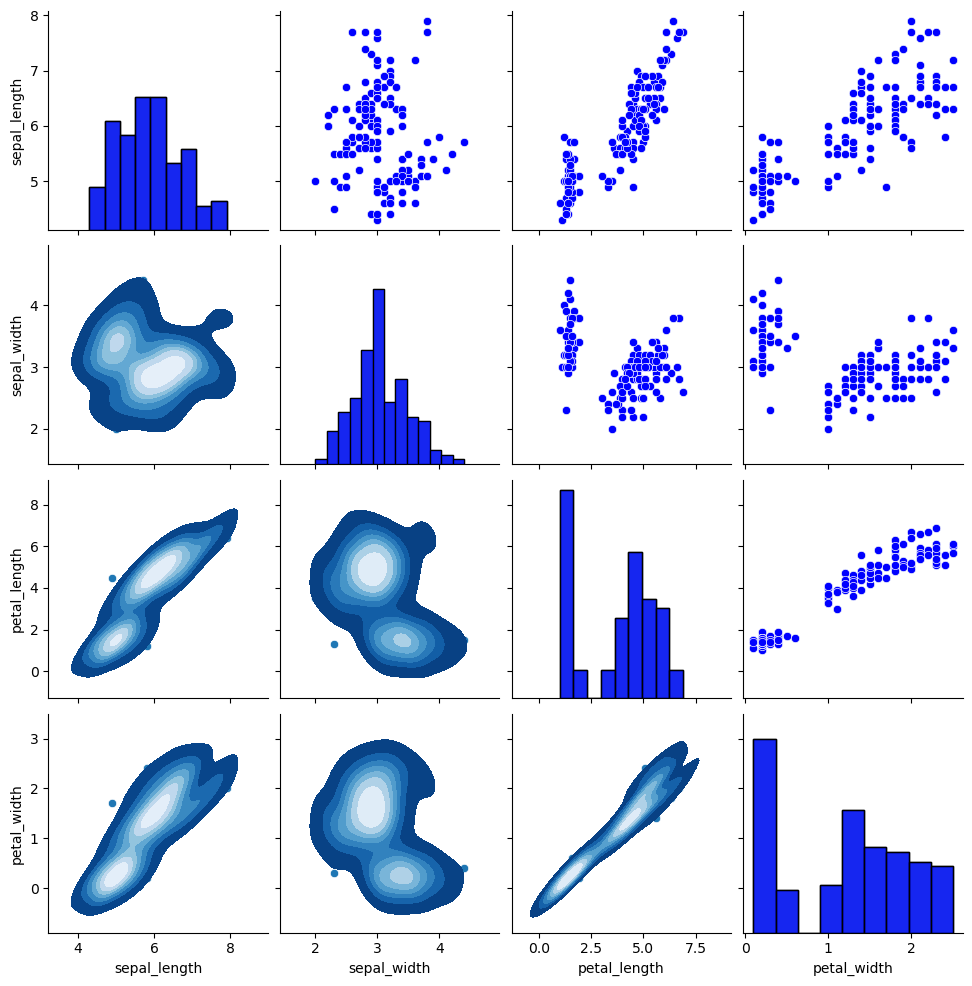

In [23]:
g = sns.pairplot(iris_sns) # 绘制无类别标签的成对关系图
g.map_upper(sns.scatterplot, color='b') # 设置上三角区域的图形为散点图
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_r") # 设置下三角区域的图形为核密度估计图
g.map_diag(sns.histplot, kde=False, color='b') # 设置对角线区域的图形为直方图

## 类别数据

## 类别数据，单变量分析

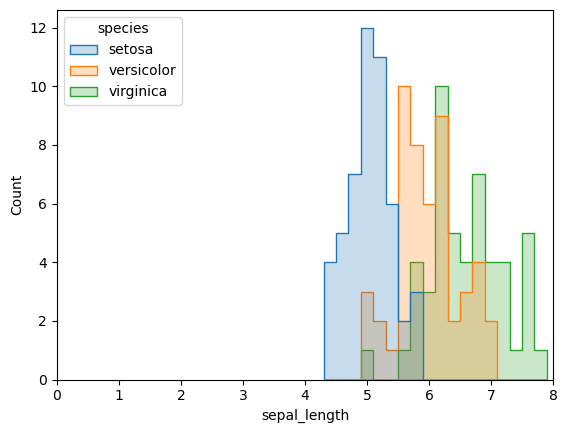

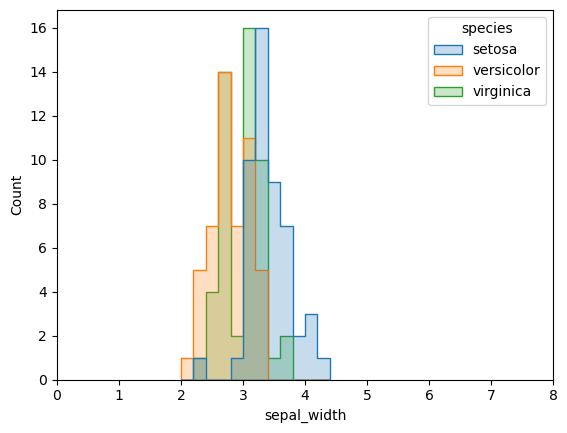

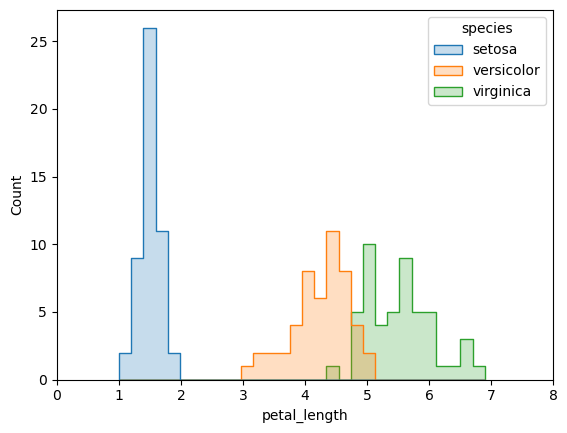

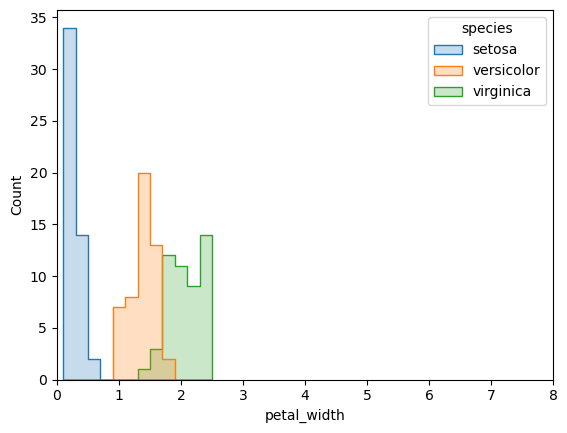

In [24]:
for i in [0,1,2,3]:
    fig, ax = plt.subplots()
    sns.histplot(data=iris_sns, x=iris_sns.columns[i], hue="species", binwidth=0.2, element="step") # 绘制按类别分组的单变量直方图
    ax.set_xlim([0,8]) # 设置x轴范围

## 类别数据，双变量分析

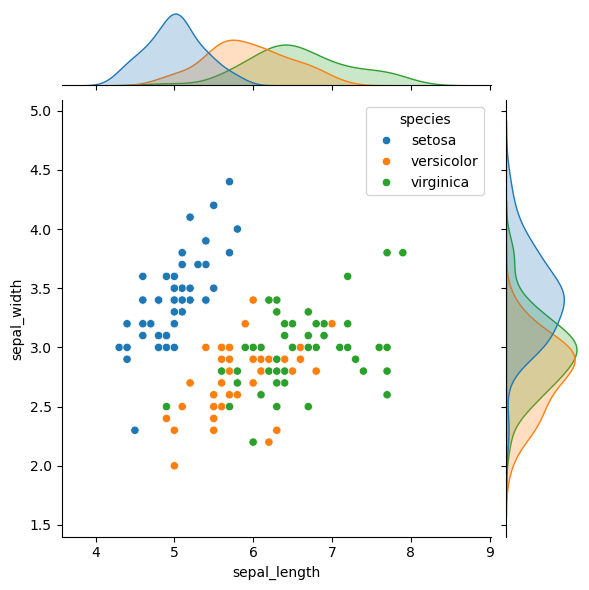

In [25]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species") # 绘制双变量的联合图，按类别分组

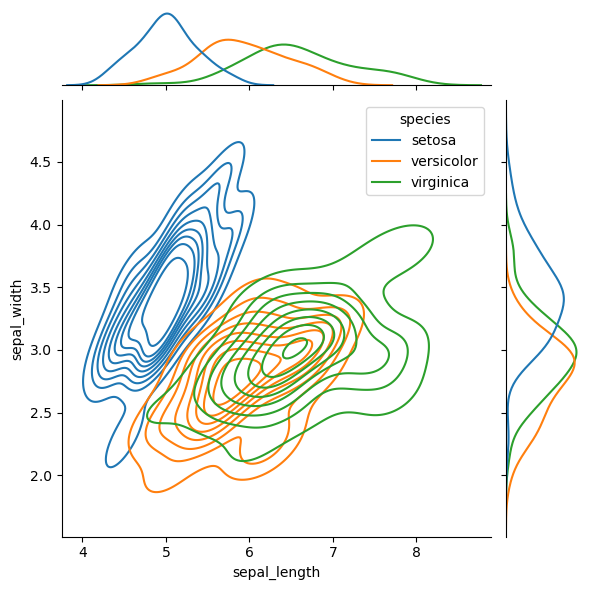

In [26]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde', hue="species") # 绘制双变量的联合核密度图，按类别分组

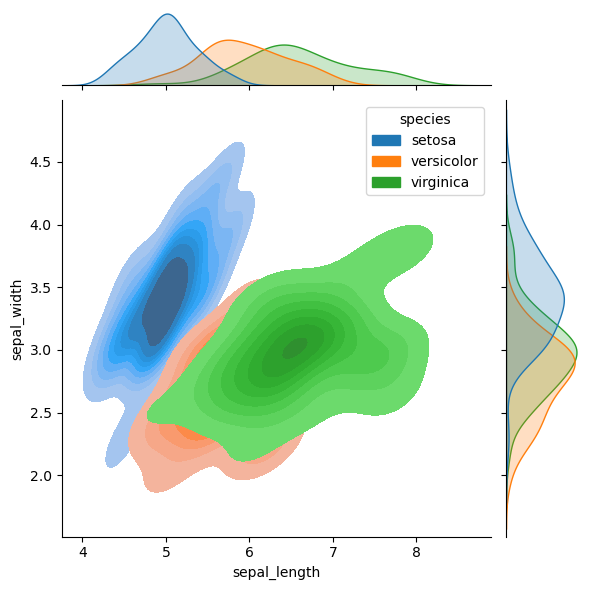

In [27]:
sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", kind='kde', fill=True, hue="species") # 绘制双变量的填充核密度图，按类别分组

## 按类别的回归图

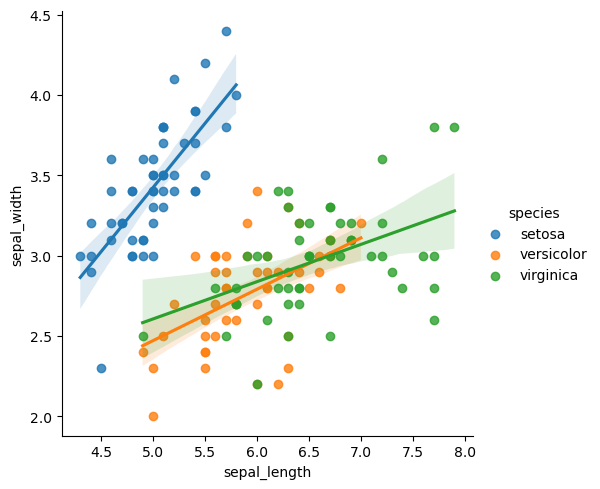

In [28]:
sns.lmplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species") # 绘制按类别的线性回归图

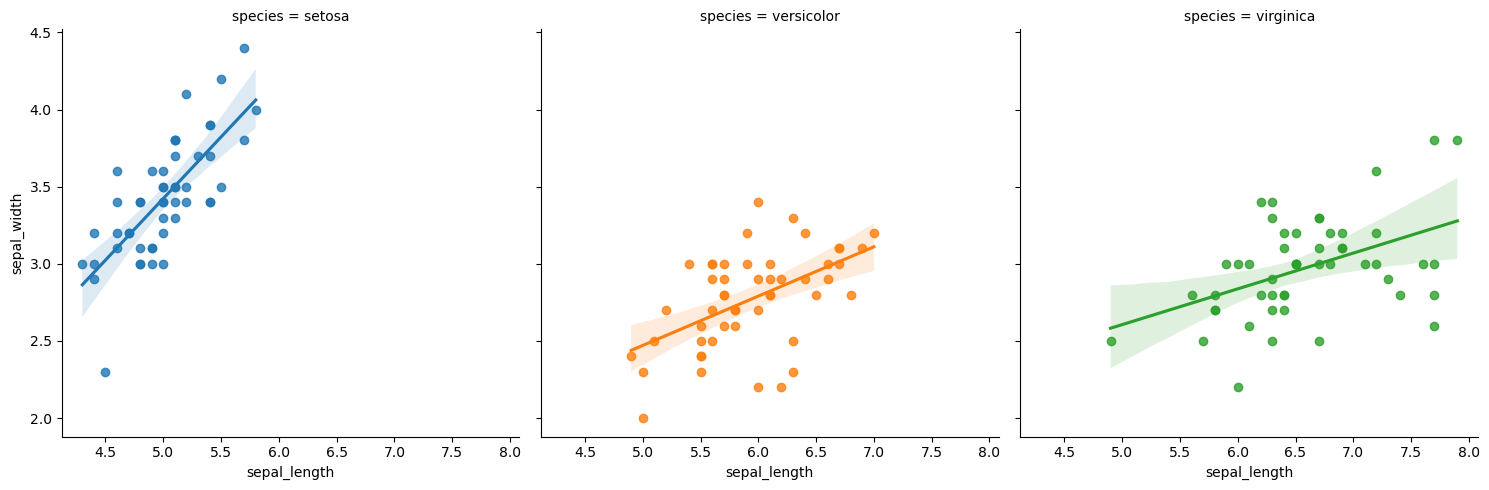

In [29]:
sns.lmplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species", col="species") # 绘制每个类别单独分栏的线性回归图

## 成对关系图，带类别标签

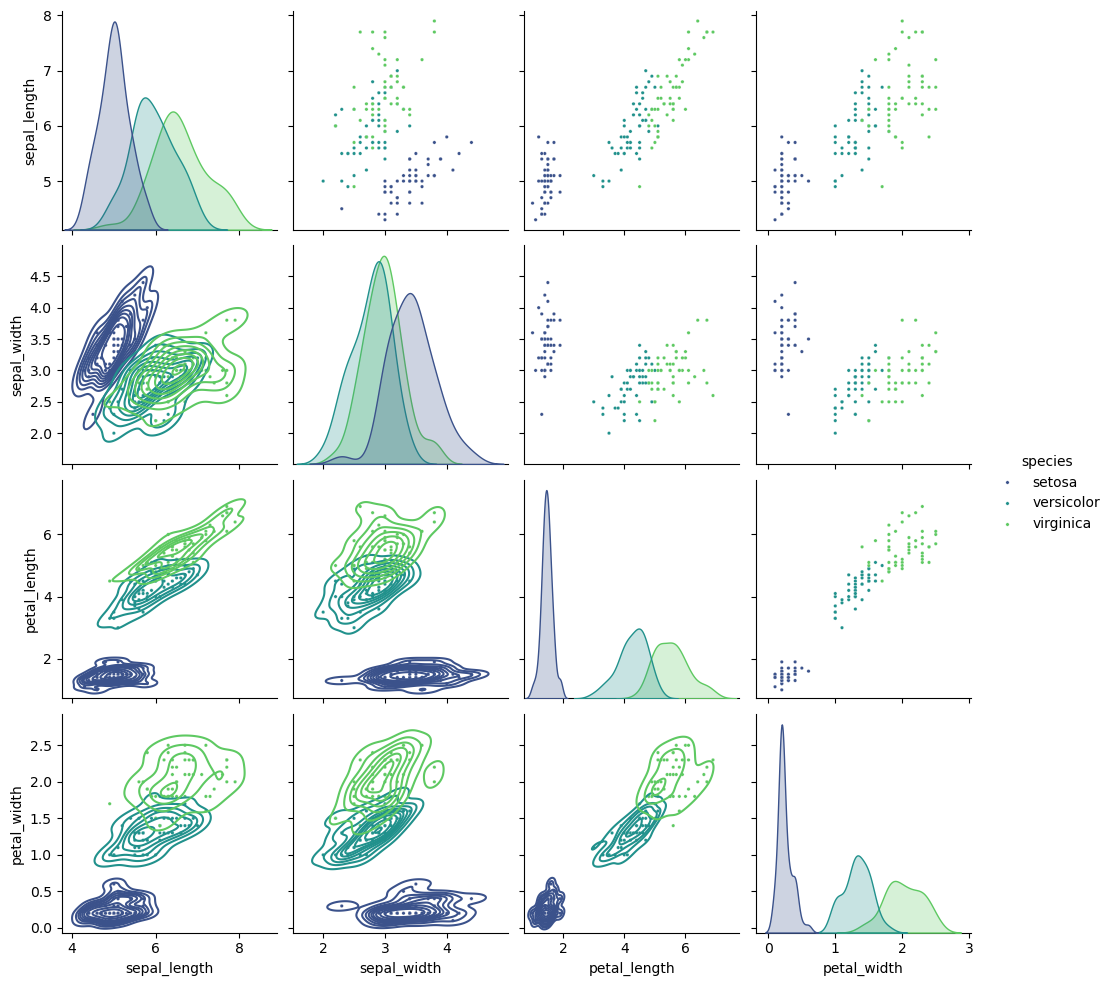

In [30]:
g = sns.pairplot(iris_sns, hue="species", plot_kws={"s": 6}, palette="viridis") # 绘制成对关系图，按类别分组
g.map_lower(sns.kdeplot) # 设置下三角区域的图形为核密度估计图

## 平行坐标图

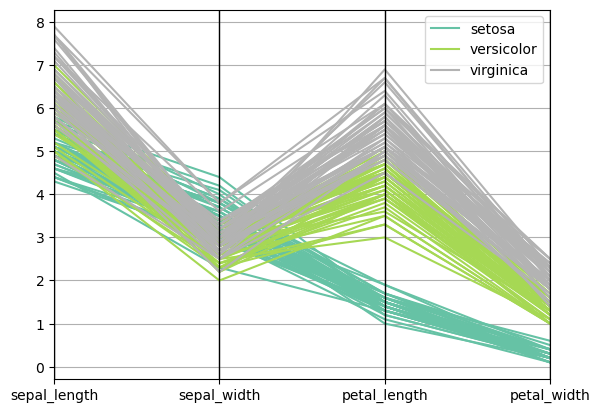

In [31]:
fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(iris_sns, 'species', colormap=plt.get_cmap("Set2")) # 绘制平行坐标图
plt.show()

## Joy plot图

(<Figure size 640x480 with 5 Axes>,
 [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >])

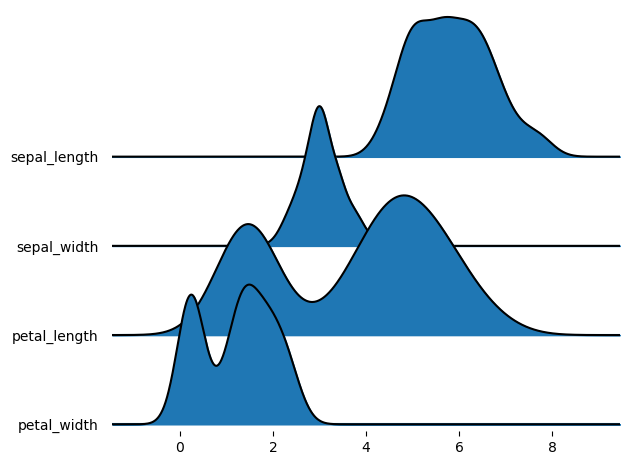

In [32]:
import joypy # 导入joypy库
# pip install joypy
joypy.joyplot(iris_sns, ylim='own') # 绘制Joy plot图

(<Figure size 640x480 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

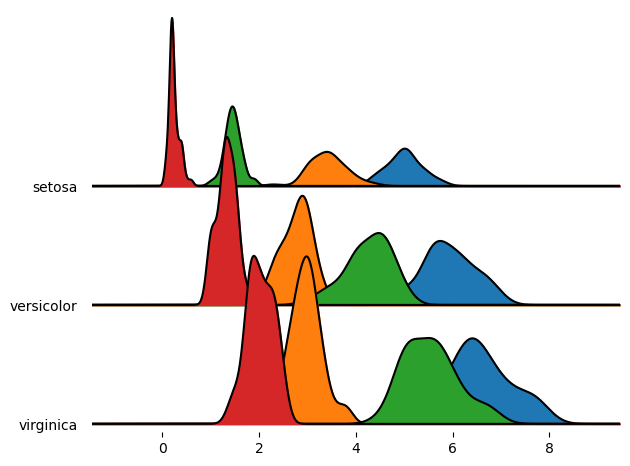

In [33]:
joypy.joyplot(iris_sns, column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], by="species", ylim='own') # 按类别绘制特征列的Joy plot图

(<Figure size 640x480 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

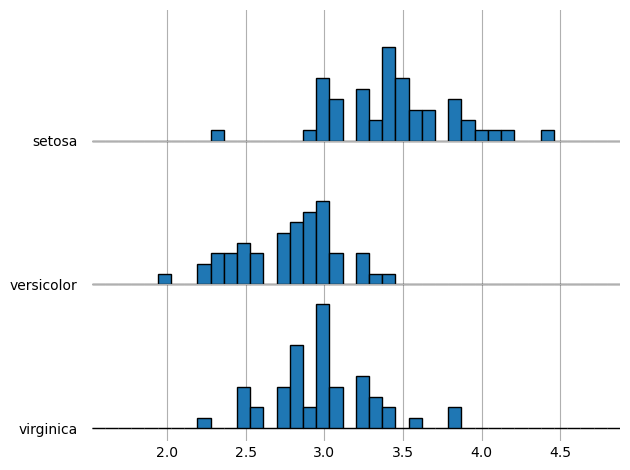

In [34]:
joypy.joyplot(iris_sns, by="species", column="sepal_width", hist=True, bins=40, overlap=0, grid=True) # 绘制按类别的特征列直方Joy plot图

## 添加均值到直方图

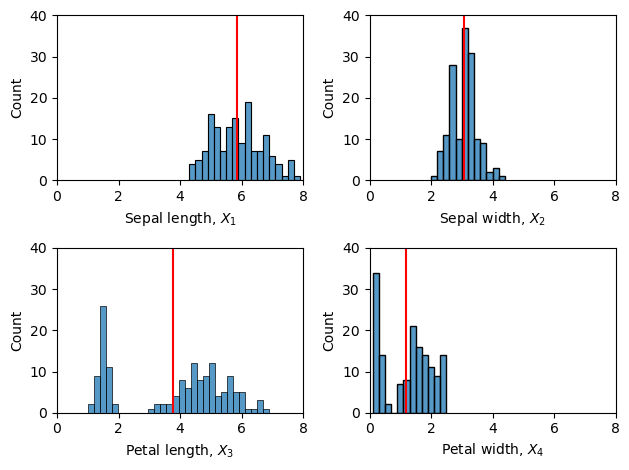

In [35]:
fig, axes = plt.subplots(2,2)
sns.histplot(data=X_df, x=feature_names[0], binwidth=0.2, ax=axes[0][0]) # 绘制第一个特征的直方图
axes[0][0].set_xlim([0,8]); axes[0][0].set_ylim([0,40]) # 设置坐标轴范围
axes[0][0].vlines(x=X_df.mean()[feature_names[0]], ymin=0, ymax=40, color='r') # 绘制均值垂线

sns.histplot(data=X_df, x=feature_names[1], binwidth=0.2, ax=axes[0][1]) # 绘制第二个特征的直方图
axes[0][1].set_xlim([0,8]); axes[0][1].set_ylim([0,40])
axes[0][1].vlines(x=X_df.mean()[feature_names[1]], ymin=0, ymax=40, color='r')

sns.histplot(data=X_df, x=feature_names[2], binwidth=0.2, ax=axes[1][0]) # 绘制第三个特征的直方图
axes[1][0].set_xlim([0,8]); axes[1][0].set_ylim([0,40])
axes[1][0].vlines(x=X_df.mean()[feature_names[2]], ymin=0, ymax=40, color='r')

sns.histplot(data=X_df, x=feature_names[3], binwidth=0.2, ax=axes[1][1]) # 绘制第四个特征的直方图
axes[1][1].set_xlim([0,8]); axes[1][1].set_ylim([0,40])
axes[1][1].vlines(x=X_df.mean()[feature_names[3]], ymin=0, ymax=40, color='r')

plt.tight_layout() # 调整布局

## 添加均值到联合图

(2.0, 4.5)

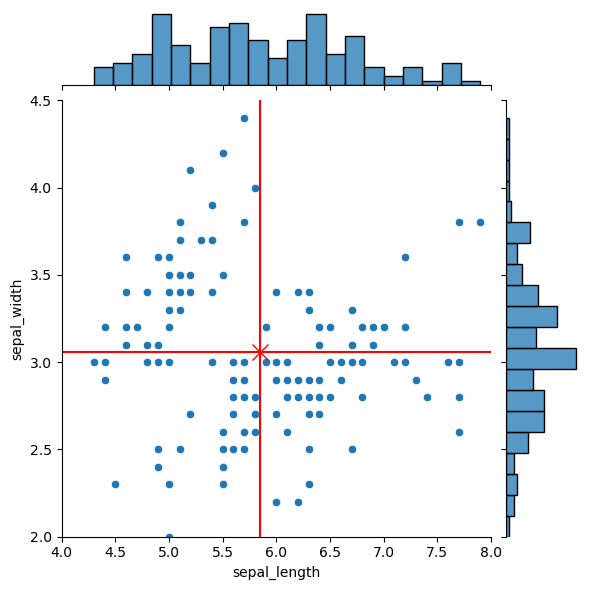

In [36]:
scatter_ax = sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width",
                           marginal_kws=dict(bins=20, fill=True)) # 绘制联合图

scatter_ax.ax_joint.axvline(x=X_df.mean()[feature_names[0]], color='r') # 绘制花萼长度的均值垂线
scatter_ax.ax_joint.axhline(y=X_df.mean()[feature_names[1]], color='r') # 绘制花萼宽度的均值水平线

scatter_ax.ax_joint.plot(X_df.mean()[feature_names[0]],
                        X_df.mean()[feature_names[1]],
                        marker='x', markersize='12',
                        color='r') # 绘制均值的交叉点
scatter_ax.ax_joint.set_xlim(4,8) # 设置x轴范围
scatter_ax.ax_joint.set_ylim(2,4.5) # 设置y轴范围

## 添加类别均值到联合图

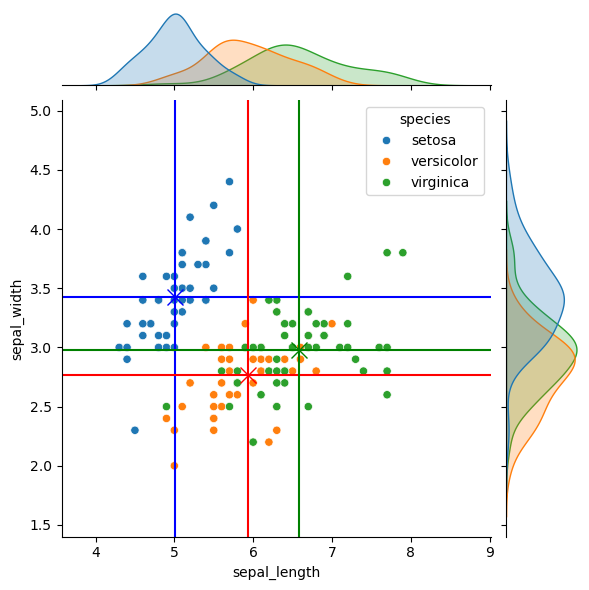

In [37]:
scatter_ax = sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", hue="species") # 绘制带类别信息的联合图

for label, color in zip(['setosa', 'versicolor', 'virginica'], ['b', 'r', 'g']): # 循环每个类别
    mu_x1_class = iris_sns.loc[iris_sns['species'] == label, 'sepal_length'].mean() # 计算花萼长度的类别均值
    mu_x2_class = iris_sns.loc[iris_sns['species'] == label, 'sepal_width'].mean() # 计算花萼宽度的类别均值

    scatter_ax.ax_joint.axvline(x=mu_x1_class, color=color) # 绘制类别均值的垂线
    scatter_ax.ax_joint.axhline(y=mu_x2_class, color=color) # 绘制类别均值的水平线
    scatter_ax.ax_joint.plot(mu_x1_class, mu_x2_class,
                            marker='x', markersize='12',
                            color=color) # 绘制类别均值的交叉点

## 直方图添加均值与标准差

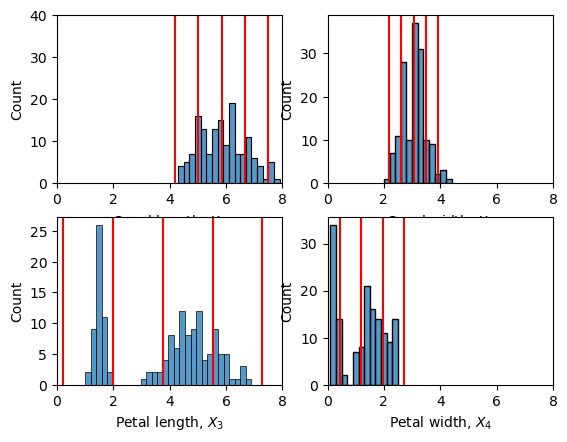

In [38]:
num = 0
fig, axes = plt.subplots(2, 2)

for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=X_df, x=feature_names[num], binwidth=0.2, ax=axes[i][j]) # 绘制特征的直方图
        axes[i][j].set_xlim([0, 8]); axes[0][0].set_ylim([0, 40]) # 设置坐标轴范围

        mu = X_df[feature_names[num]].mean() # 计算均值
        std = X_df[feature_names[num]].std() # 计算标准差

        axes[i][j].axvline(x=mu, color='r') # 绘制均值的垂线
        axes[i][j].axvline(x=mu - std, color='r') # 绘制均值减去一个标准差的垂线
        axes[i][j].axvline(x=mu + std, color='r') # 绘制均值加上一个标准差的垂线
        axes[i][j].axvline(x=mu - 2*std, color='r') # 绘制均值减去两个标准差的垂线
        axes[i][j].axvline(x=mu + 2*std, color='r') # 绘制均值加上两个标准差的垂线

        num = num + 1

## 打印鸢尾花数据集的汇总信息

In [39]:
print(iris_sns.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])) # 打印数据汇总信息，包括分位数

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
1%         4.400000     2.200000      1.149000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
99%        7.700000     4.151000      6.700000     2.500000
max        7.900000     4.400000      6.900000     2.500000


## 四分位数

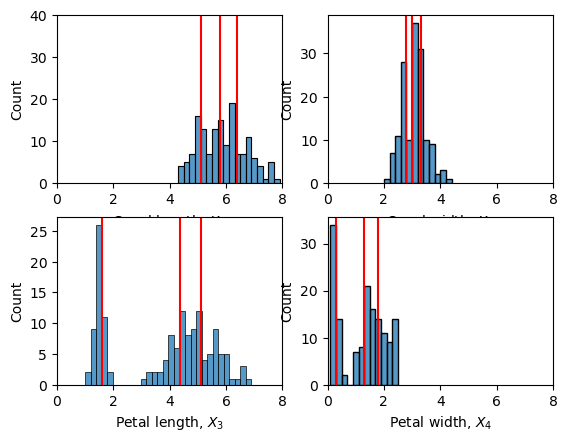

In [40]:
num = 0
fig, axes = plt.subplots(2, 2)

for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=X_df, x=feature_names[num], binwidth=0.2, ax=axes[i][j]) # 绘制特征的直方图
        axes[i][j].set_xlim([0, 8]); axes[0][0].set_ylim([0, 40]) # 设置坐标轴范围

        q75, q50, q25 = np.percentile(X_df[feature_names[num]], [75, 50, 25]) # 计算四分位数
        axes[i][j].axvline(x=q75, color='r') # 绘制上四分位数的垂线
        axes[i][j].axvline(x=q50, color='r') # 绘制中位数的垂线
        axes[i][j].axvline(x=q25, color='r') # 绘制下四分位数的垂线

        num = num + 1

## 百分位数

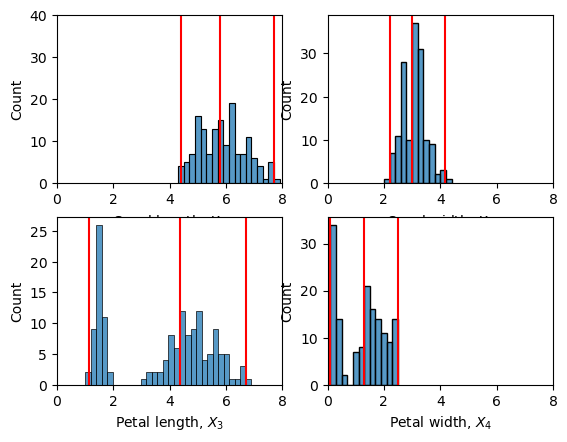

In [41]:
num = 0
fig, axes = plt.subplots(2, 2)

for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=X_df, x=feature_names[num], binwidth=0.2, ax=axes[i][j]) # 绘制特征的直方图
        axes[i][j].set_xlim([0, 8]); axes[0][0].set_ylim([0, 40]) # 设置坐标轴范围

        q1, q50, q99 = np.percentile(X_df[feature_names[num]], [1, 50, 99]) # 计算百分位数
        axes[i][j].axvline(x=q1, color='r') # 绘制1%百分位的垂线
        axes[i][j].axvline(x=q50, color='r') # 绘制50%百分位的垂线
        axes[i][j].axvline(x=q99, color='r') # 绘制99%百分位的垂线

        num = num + 1

## 数据箱线图

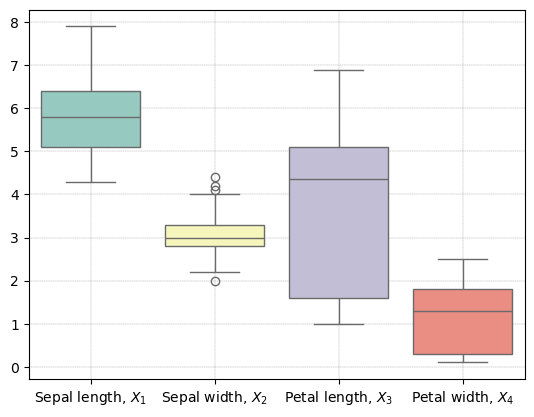

In [42]:
fig, ax = plt.subplots()
sns.boxplot(data=X_df, palette="Set3") # 绘制箱线图
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5]) # 设置网格线样式

## 数据小提琴图

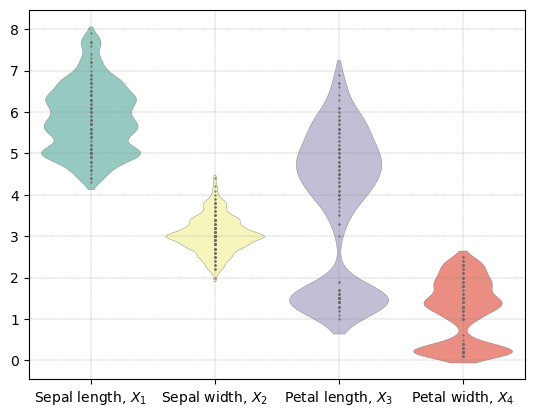

In [43]:
fig, ax = plt.subplots()
sns.violinplot(data=X_df, palette="Set3", bw_method=0.2, cut=1, linewidth=0.25, inner="points", orient="v") # 绘制小提琴图
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5]) # 设置网格线样式

C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.3% of the points c

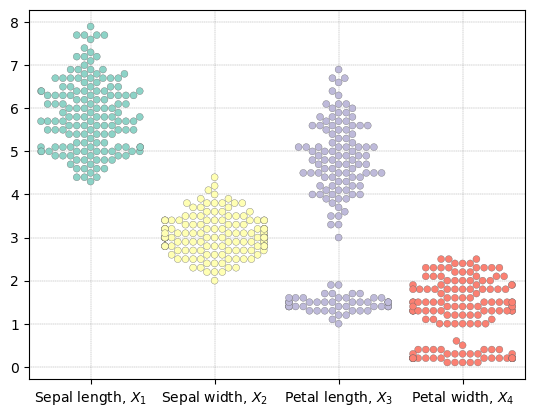

In [44]:
fig, ax = plt.subplots()
sns.swarmplot(data=X_df, palette="Set3", linewidth=0.25, orient="v") # 绘制散点群图
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5]) # 设置网格线样式

## 组合箱线图和散点群图

C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

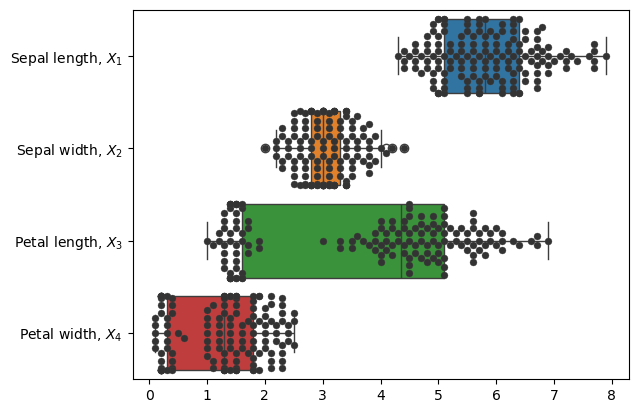

In [45]:
fig, ax = plt.subplots()
sns.boxplot(data=X_df, orient="h") # 绘制横向箱线图
sns.swarmplot(data=X_df, linewidth=0.25, orient="h", color=".2") # 在箱线图上叠加散点群图

## 按标签分类的箱线图

In [46]:
iris_long = iris_sns.melt(id_vars=['species']) # 将数据框重塑为长格式

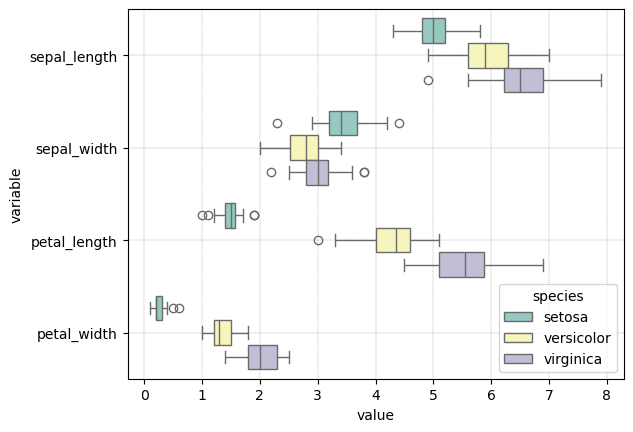

In [47]:
fig, ax = plt.subplots()
sns.boxplot(data=iris_long, x="value", y="variable", orient="h", hue='species', palette="Set3") # 绘制分类箱线图
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5]) # 设置网格线样式

## 协方差矩阵的热力图

In [48]:
SIGMA = X_df.cov() # 计算协方差矩阵

Text(0.5, 1.0, 'Covariance matrix')

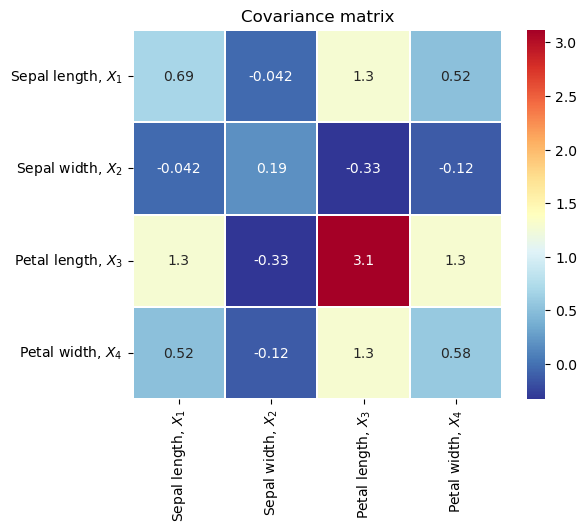

In [49]:
fig, axs = plt.subplots()
h = sns.heatmap(SIGMA, cmap='RdYlBu_r', linewidths=.05, annot=True) # 绘制协方差矩阵的热力图
h.set_aspect("equal") # 设置热力图为等比例
h.set_title('Covariance matrix') # 设置标题

In [50]:
RHO = X_df.corr() # 计算相关系数矩阵

Text(0.5, 1.0, 'Correlation matrix')

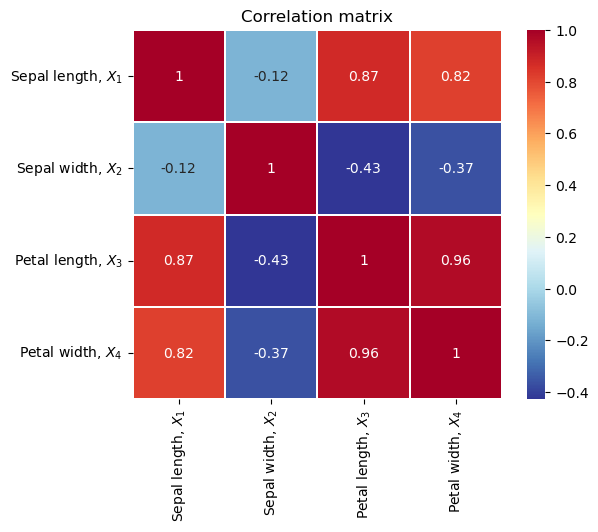

In [51]:
fig, axs = plt.subplots()
h = sns.heatmap(RHO, cmap='RdYlBu_r', linewidths=.05, annot=True) # 绘制相关系数矩阵的热力图
h.set_aspect("equal") # 设置热力图为等比例
h.set_title('Correlation matrix') # 设置标题

## 偏度和峰度

In [52]:
print(X_df.skew()) # 打印特征的偏度

Sepal length, $X_1$    0.314911
Sepal width, $X_2$     0.318966
Petal length, $X_3$   -0.274884
Petal width, $X_4$    -0.102967
dtype: float64


In [53]:
print(X_df.kurt()) # 打印特征的峰度

Sepal length, $X_1$   -0.552064
Sepal width, $X_2$     0.228249
Petal length, $X_3$   -1.402103
Petal width, $X_4$    -1.340604
dtype: float64


## 比较协方差矩阵

In [54]:
iris_sns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0.5, 1.0, 'Y = 2, virginica')

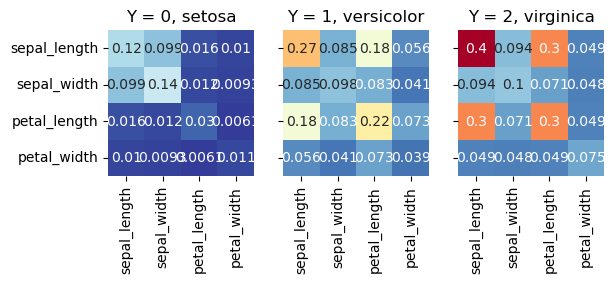

In [55]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
g1 = sns.heatmap(iris_sns[iris_sns.species == 'setosa'].iloc[:,:-1].cov(), 
                 cmap="RdYlBu_r", 
                 annot=True, 
                 cbar=False, ax=ax1, 
                 square=True, vmax=0.4, vmin=0) # 绘制类别0的协方差矩阵
ax1.set_title('Y = 0, setosa') # 设置标题

g2 = sns.heatmap(iris_sns[iris_sns.species == 'versicolor'].iloc[:,:-1].cov(), 
                 cmap="RdYlBu_r", 
                 annot=True, 
                 cbar=False, ax=ax2, 
                 square=True, vmax=0.4, vmin=0) # 绘制类别0的协方差矩阵
ax2.set_title('Y = 1, versicolor') # 设置标题

g3 = sns.heatmap(iris_sns[iris_sns.species == 'virginica'].iloc[:,:-1].cov(), 
                 cmap="RdYlBu_r", 
                 annot=True, 
                 cbar=False, ax=ax3, 
                 square=True, vmax=0.4, vmin=0) # 绘制类别0的协方差矩阵
ax3.set_title('Y = 2, virginica') # 设置标题

## 比较线性相关系数矩阵

Text(0.5, 1.0, 'Y = 2, virginica')

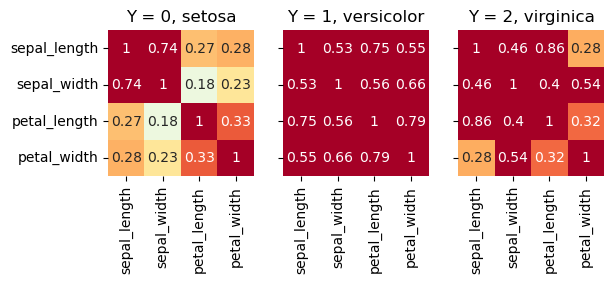

In [56]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
g1 = sns.heatmap(iris_sns[iris_sns.species == 'setosa'].iloc[:,:-1].corr(), 
                 cmap="RdYlBu_r", 
                 annot=True, 
                 cbar=False, ax=ax1, 
                 square=True, vmax=0.4, vmin=0) # 绘制类别0的线性相关系数
ax1.set_title('Y = 0, setosa') # 设置标题

g2 = sns.heatmap(iris_sns[iris_sns.species == 'versicolor'].iloc[:,:-1].corr(), 
                 cmap="RdYlBu_r", 
                 annot=True, 
                 cbar=False, ax=ax2, 
                 square=True, vmax=0.4, vmin=0) # 绘制类别0的线性相关系数
ax2.set_title('Y = 1, versicolor') # 设置标题

g3 = sns.heatmap(iris_sns[iris_sns.species == 'virginica'].iloc[:,:-1].corr(), 
                 cmap="RdYlBu_r", 
                 annot=True, 
                 cbar=False, ax=ax3, 
                 square=True, vmax=0.4, vmin=0) # 绘制类别0的线性相关系数
ax3.set_title('Y = 2, virginica') # 设置标题